In [1]:
import matplotlib.pyplot as plt
import torch
import numpy as np
import os
from ctd.comparison.analysis.tt.tt import Analysis_TT 
from ctd.comparison.analysis.tt.tasks.tt_MultiTask import Analysis_TT_MultiTask 
from ctd.comparison.analysis.tt.tasks.tt_RandomTarget import TT_RandomTarget
from ctd.comparison.analysis.dd.dd import Analysis_DD
# Import pca
import dotenv
from ctd.comparison.comparison import Comparison

dotenv.load_dotenv(dotenv.find_dotenv())

True

In [2]:
HOME_DIR = os.environ['HOME_DIR']
print(HOME_DIR)

pathNBFF = HOME_DIR + "content/trained_models/task-trained/tt_3bff/"
an_NBFF = Analysis_TT(run_name = "NBFF", filepath = pathNBFF)

pathMT = HOME_DIR + "content/trained_models/task-trained/tt_MultiTask/"
an_MT = Analysis_TT_MultiTask(run_name = "MT", filepath = pathMT)

pathRT = HOME_DIR + 'content/trained_models/task-trained/tt_RandomTarget/'
an_RT = TT_RandomTarget(run_name = "RT", filepath = pathRT)

# pathDT = pathTT + "20240402_NBFF_LFADS_DT_WDecay_Sweep2/gen_model=GRU_RNN prefix=20240328_NBFF_GRU_Final seed=0 max_epochs=1500 weight_decay=0.001/"
# an_DT = Analysis_DT(run_name = "DT", filepath = pathDT, model_type = "LFADS")
# an_TT.generate_latent_video(dims_by= "PCA")
# an_TT.plot_latents_aligned_video()

/home/csverst/Github/CtDBenchmark/


In [3]:
inputs_nbff = an_NBFF.get_inputs(phase = "val")

inputs_mt = an_MT.get_inputs(phase = "val")

inputs_rt = an_RT.get_inputs(phase = "val")

outputs_nbff = an_NBFF.get_model_outputs(phase = "val")
controlled_nbff = outputs_nbff['controlled'].detach().cpu().numpy()

outputs_mt = an_MT.get_model_outputs(phase="val")
controlled_mt = outputs_mt['controlled'].detach().cpu().numpy()

outputs_rt = an_RT.get_model_outputs(phase="val")
controlled_rt = outputs_rt['controlled'].detach().cpu().numpy()



In [4]:
print(outputs_nbff.keys())

dict_keys(['controlled', 'latents', 'actions', 'states', 'joints'])


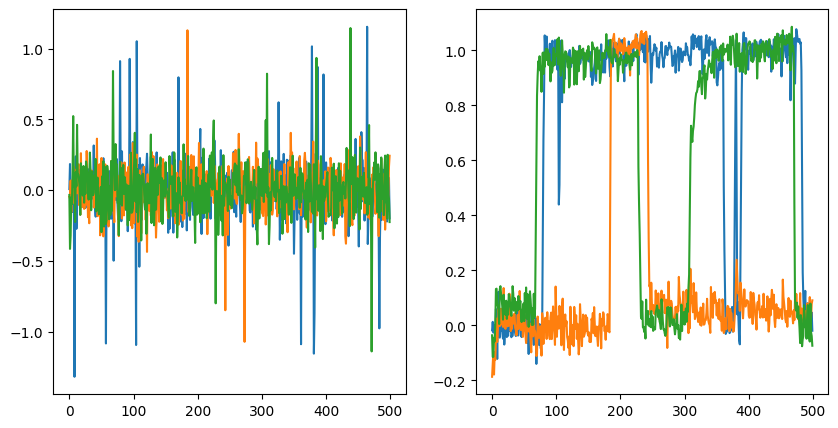

In [5]:
figure = plt.figure(figsize=(10, 5))
ax = figure.add_subplot(121)
ax.plot(inputs_nbff[0,:,0])
ax.plot(inputs_nbff[0,:,1])
ax.plot(inputs_nbff[0,:,2])

ax = figure.add_subplot(122)
ax.plot(controlled_nbff[0,:,0])
ax.plot(controlled_nbff[0,:,1])
ax.plot(controlled_nbff[0,:,2])
# Save as pdf
plt.savefig("i_o_nbff.pdf")

{'context': [0, 23], 'stim1': [23, 34], 'mem1': [34, 109], 'response': [109, 130]}
['Fixation', 'StimMod1Cos', 'StimMod1Sin', 'StimMod2Cos', 'StimMod2Sin', 'DelayPro', 'DelayAnti', 'MemoryPro', 'MemoryAnti', 'ReactPro', 'ReactAnti', 'IntMod1', 'IntMod2', 'ContextIntMod1', 'ContextIntMod2', 'ContextIntMultimodal', 'ReactMatch2Sample', 'ReactNonMatch2Sample', 'ReactCatPro', 'ReactCatAnti']
94


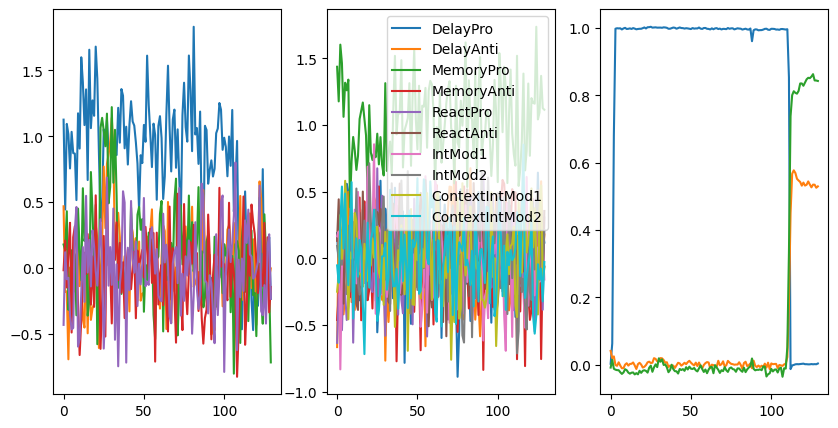

In [6]:
trial_num = 1
n_mt_inputs = inputs_mt.shape[-1]
n_mt_outputs= controlled_mt.shape[-1]
task_flag, phase_dict = an_MT.get_task_flag('MemoryPro', phase = 'val')
print(phase_dict[0])
inputs_memPro = inputs_mt[task_flag,:,:]
controlled_memPro = controlled_mt[task_flag,:,:]
response_ind = phase_dict[0]['response'][1]
task_env = an_MT.datamodule.data_env
input_labels = task_env.input_labels
print(input_labels)
print(np.sum(task_flag))
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(131)
for i in range(5):
    ax.plot(inputs_memPro[0,:response_ind,i], label = input_labels[i])

ax = fig.add_subplot(132)
for i in range(5, 15):
    ax.plot(inputs_memPro[0,:response_ind,i], label = input_labels[i])
ax.legend()

ax = fig.add_subplot(133)
for i in range(n_mt_outputs):
    ax.plot(controlled_memPro[0,:response_ind,i])
plt.savefig("i_o_mt.pdf")


In [7]:
import pickle as pkl

input_labels = [
            "Fixation",
            "StimMod1Cos",
            "StimMod1Sin",
            "StimMod2Cos",
            "StimMod2Sin",
            "DelayPro",
            "DelayAnti",
            "MemoryPro",
            "MemoryAnti",
            "ReactPro",
            "ReactAnti",
            "IntMod1",
            "IntMod2",
            "ContextIntMod1",
            "ContextIntMod2",
            "ContextIntMultimodal",
            "ReactMatch2Sample",
            "ReactNonMatch2Sample",
            "ReactCatPro",
            "ReactCatAnti",
        ]
wrapper = an_MT.wrapper
wrapper.task_env.input_labels = input_labels

with open("model.pkl", "wb") as f:
    pkl.dump(wrapper, f)

n_rt_inputs: 3, n_rt_outputs: 2, n_rt_actions: 6, n_states_rt: 14


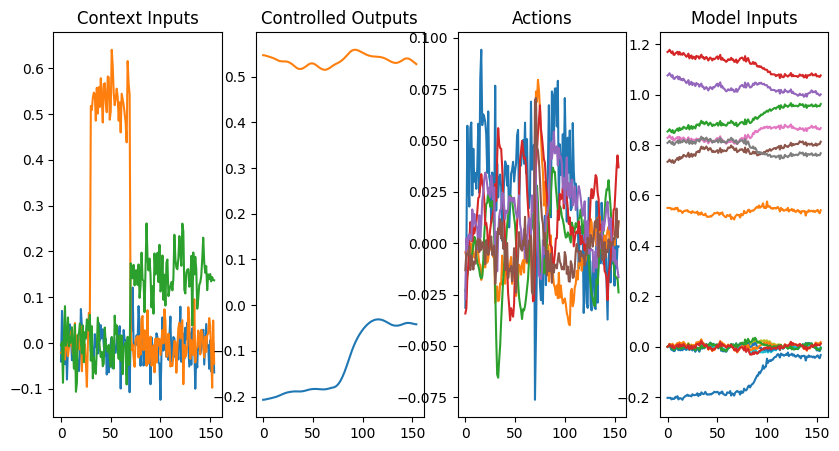

In [8]:

actions_rt = outputs_rt['actions'].detach().cpu().numpy()
states_rt = outputs_rt['states'].detach().cpu().numpy()

n_rt_inputs = inputs_rt.shape[-1]
n_rt_outputs= controlled_rt.shape[-1]
n_rt_actions = actions_rt.shape[-1]
n_states_rt = states_rt.shape[-1]

print(f"n_rt_inputs: {n_rt_inputs}, n_rt_outputs: {n_rt_outputs}, n_rt_actions: {n_rt_actions}, n_states_rt: {n_states_rt}")
fig = plt.figure(figsize=(10, 5))
ax = fig.add_subplot(141)
for i in range(n_rt_inputs):
    ax.plot(inputs_rt[0,:,i])
ax.set_title("Context Inputs")

ax = fig.add_subplot(142)
for i in range(n_rt_outputs):
    ax.plot(controlled_rt[0,:,i])
ax.set_title("Controlled Outputs")

ax = fig.add_subplot(143)
for i in range(n_rt_actions):
    ax.plot(actions_rt[0,:,i])
ax.set_title("Actions")

ax = fig.add_subplot(144)
for i in range(n_states_rt):
    ax.plot(states_rt[0,:,i])
ax.set_title("Model Inputs")
plt.savefig("i_o_rt.pdf")